In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from scipy.optimize import curve_fit
import straxbra
from pymongo import MongoClient
import os
import strax
import json
import patrick_stylez as ps

In [23]:
ctx = straxbra.XebraContext(register=[straxbra.plugins.DAQReader],
                            config={'do_breaks' : False})
all_gains = {}

In [24]:

raw = ctx.get_array(run, 'raw_records')


In [32]:



def PlotForRun(context, run):
    fig, axs = plt.subplots(figsize=(18,12), nrows=3, ncols=3)
#     raw = ctx.get_array(run, 'raw_records')
    window_low = 40
    window_high = 65



    for ch in range(8):
#         if (ch==0 or ch==1 or ch == 6):
#                bin_high =1250
#         if (ch == 2 or ch == 4):
#             bin_high = 1550
#         if (ch == 3 or ch == 7):
#             bin_high = 2150
#         if ch == 5:
#             bin_high = 950 
        bin_high = 450    
        num_bins = int((bin_high+30)/3)


        bins = np.linspace(-30,bin_high,num_bins)
        bin_widths = bins[1:] - bins[:-1]
        bin_centers = 0.5*(bins[1:] + bins[:-1])
        ax = axs[ch//3][ch%3]
        n, _ = np.histogram(raw['data'][raw['channel'] == ch,window_low:window_high].sum(axis=1), bins=bins)
        sigma = np.maximum(np.ones_like(n), np.sqrt(n)/bin_widths)


        ax.plot(bin_centers, n, c='k', alpha = 0.5)

        ax.set_ylim([1,None])
        ax.legend()
#         print(popt[7]*adc_to_e)

        ax.set_yscale('log')
        
    plt.show()

    return

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


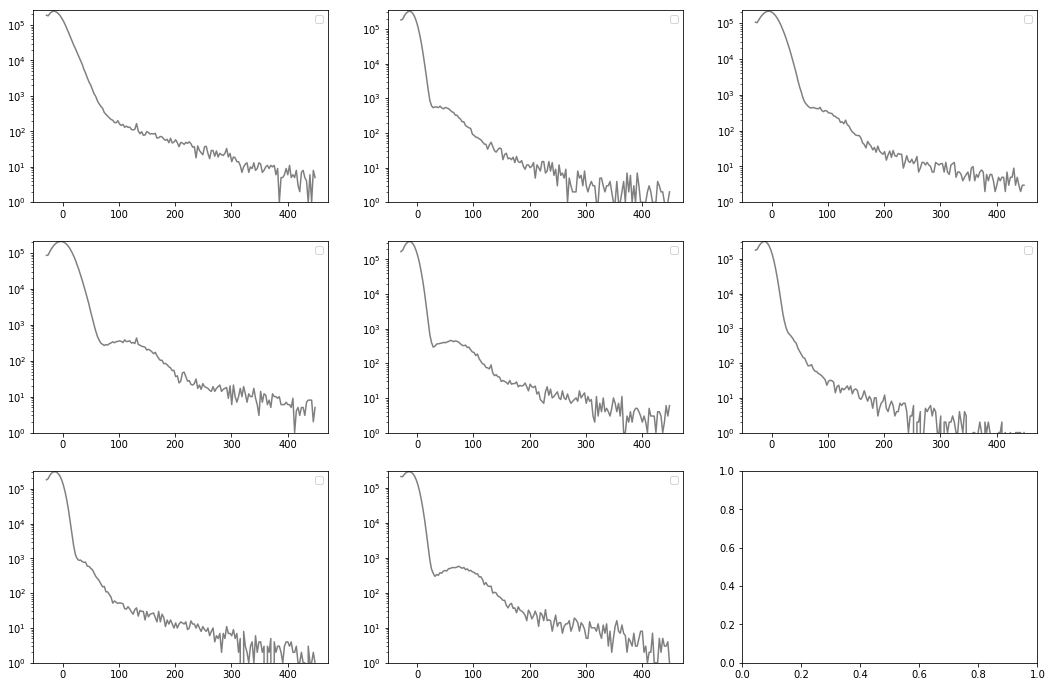

In [34]:
run = '00216'
PlotForRun(ctx,run)